# Analytic Questions

* **AQ1**: Is there a significant difference between the mental health of employees across the attribute of gender? 
* **AQ2**: Is there a significant difference between the mental health of employees across the attribute of age? 
* **AQ3**: Do more supportive companies have healthier employees mentally? 
* **AQ4**: Does the attitude of individuals toward mental health influence their mental health and their seeking of treatments?



# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import warnings
#warnings.filterwarnings('ignore')

# Integrating the Data Sources

In [2]:
# Integrating the 5 datasets into one dataset.

# loading data

df_2016 = pd.read_csv('./data/2016.csv')
df_2017 = pd.read_csv('./data/2017.csv')
df_2018 = pd.read_csv('./data/2018.csv')
df_2019 = pd.read_csv('./data/2019.csv')
df_2020 = pd.read_csv('./data/2020.csv')



In [3]:
print(df_2016.shape)
print(df_2017.shape)
print(df_2018.shape)
print(df_2019.shape)
print(df_2020.shape)

(1433, 63)
(756, 123)
(417, 123)
(352, 82)
(180, 120)


dataset of 2017 and 2018 have the highest number of attributes

In [4]:
# removing HTML tags from Columns indexes
import re

def html_remover(data):
    new_cols = []
    for cols in data.columns:
        new_cols.append(re.sub(r'<.*?>', '', cols))

    s = pd.Series(new_cols)
    data.columns = new_cols
    return data


In [5]:
list_data = [df_2016, df_2017, df_2018, df_2019, df_2020]

for df in list_data:
    df = html_remover(df)

In [6]:
# 1. understanding the common attributes between the 5 datasets
# is there consistent wording between them
# use SequenceMatcher from the difflib module to find attributes that are similar.

from difflib import SequenceMatcher
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [7]:
# testing the function 
similar('Clear', 'clearer')

0.6666666666666666

In [8]:
Columns = pd.DataFrame(index= df_2017.columns, columns=['y2016','y2017', 'y2018', 'y2019', 'y2020'])
Columns.y2017 = True

In [9]:
df = [(df_2016, 'y2016'),(df_2017, 'y2017'), (df_2018,'y2018'), (df_2019, 'y2019'), (df_2020,'y2020')]

for data in df:
    for col in data[0].columns:
        for incol in Columns.index:
            if similar(col, incol) > 0.7:
                Columns.at[incol,data[1]] = True
                
Columns[Columns.y2016 & Columns.y2017 & Columns.y2018 & Columns.y2019&Columns.y2020]

,y2016,y2017,y2018,y2019,y2020
Are you self-employed?,True,True,True,True,True
How many employees does your company or organization have?,True,True,True,True,True
Is your employer primarily a tech company/organization?,True,True,True,True,True
Is your primary role within your company related to tech/IT?,True,True,True,True,True
Does your employer provide mental health benefits as part of healthcare coverage?,True,True,True,True,True
Do you know the options for mental health care available under your employer-provided health coverage?,True,True,True,True,True
"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",True,True,True,True,True
Does your employer offer resources to learn more about mental health disorders and options for seeking help?,True,True,True,True,True
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,True,True,True,True,True
"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",True,True,True,True,True


In [10]:
# 2. Only keep the attributes that are relvant to the Analytic questions

Selected_columns = ['Does your employer provide mental health benefits as part of healthcare coverage?',
                    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
                    'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
                    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
                    'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
                    'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
                    'Would you feel comfortable discussing a mental health issue with your coworkers?',
                    'If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?',
                    'If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?',
                    'How willing would you be to share with friends and family that you have a mental illness?',
                    'What is your age?',
                    'What is your gender?',
                    'What country do you live in?',
                    'What country do you work in?',
                    'Have you ever been diagnosed with a mental health disorder?',
                    'Have you ever sought treatment for a mental health disorder from a mental health professional?']

In [11]:
# if a column in one of the data sources is not one of the selected columns above, this code drops it. 
def droping_cols(data):
    droping_cols = []
    for col in data.columns:
        maxScore = 0
        for sel_col in Selected_columns:
            if(similar(col,sel_col)>maxScore):
                maxScore = similar(col,sel_col)
        if (maxScore <0.7):
            droping_cols.append(col)
        else:
            if 'previous' in col:
                droping_cols.append(col)
   
    data.drop(columns = droping_cols, inplace=True)
    return data

    

In [12]:
list_data = [df_2016, df_2017, df_2018, df_2019, df_2020]

for df in list_data:
    df = droping_cols(df)

In [13]:
# renaming columns

# 1. Create a dictionary to map column names

Column_dict = {'SupportQ1': 'Does your employer provide mental health benefits as part of healthcare coverage?',
               'SupportQ2': 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
               'SupportQ3': 'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
               'SupportQ4': 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
               'SupportQ5': 'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
               'AttitudeQ1': 'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
               'AttitudeQ2': 'Would you feel comfortable discussing a mental health issue with your coworkers?',
               'AttitudeQ3': 'How willing would you be to share with friends and family that you have a mental illness?',
               'SupportEx1': 'If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?',
               'SupportEx2': 'If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?',
               'Age': 'What is your age?',
               'Gender': 'What is your gender?',
               'ResidingCountry': 'What country do you live in?',
               'WorkingCountry': 'What country do you work in?',
               'MentalIlness': 'Have you ever been diagnosed with a mental health disorder?',
               'Treatment' : 'Have you ever sought treatment for a mental health disorder from a mental health professional?'}


In [14]:
for col in df_2016:
    for key in Column_dict:
        if similar(col, Column_dict[key])>0.9:
            df_2016.rename({col:key}, axis='columns', inplace=True)

In [15]:
df_2016.head(1)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",AttitudeQ2,AttitudeQ1,"If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,AttitudeQ3,Have you been diagnosed with a mental health condition by a medical professional?,Treatment,Age,Gender,ResidingCountry,WorkingCountry
0,Not eligible for coverage / N/A,No,No,I don't know,Very easy,Maybe,Yes,NaN,NaN,Some of my previous employers,Somewhat open,Yes,0,39,Male,United Kingdom,United Kingdom


In [16]:
df_2016.columns

Index(['SupportQ1', 'SupportQ2', 'SupportQ3', 'SupportQ4',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'AttitudeQ2', 'AttitudeQ1',
       'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?',
       'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?',
       'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?',
       'AttitudeQ3',
       'Have you been diagnosed with a mental health condition by a medical professional?',
       'Treatment', 'Age', 'Gender', 'ResidingCountry', 'WorkingCountry'],
      dtype='object')

In [17]:
Others = {'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:': 'SupportQ5',
         'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?':'SupportEx1',
         'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?':'SupportEx2',
         'Have you been diagnosed with a mental health condition by a medical professional?':'MentalIlness'}
df_2016.rename(Others, axis='columns', inplace=True)
df_2016.head()

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ2,AttitudeQ1,SupportEx1,SupportEx2,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,AttitudeQ3,MentalIlness,Treatment,Age,Gender,ResidingCountry,WorkingCountry
0,Not eligible for coverage / N/A,No,No,I don't know,Very easy,Maybe,Yes,NaN,NaN,Some of my previous employers,Somewhat open,Yes,0,39,Male,United Kingdom,United Kingdom
1,No,Yes,Yes,Yes,Somewhat easy,Maybe,Yes,NaN,NaN,Some of my previous employers,Somewhat open,Yes,1,29,male,United States of America,United States of America
2,No,No,No,I don't know,Neither easy nor difficult,Maybe,Maybe,NaN,NaN,I don't know,Somewhat open,No,1,38,Male,United Kingdom,United Kingdom
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I'm not sure,I'm not sure,Some of my previous employers,Neutral,Yes,1,43,male,United Kingdom,United Kingdom
4,Yes,No,No,No,Neither easy nor difficult,Maybe,No,NaN,NaN,Some of my previous employers,Somewhat open,Yes,1,43,Female,United States of America,United States of America


In [18]:
df_2016 = df_2016[Column_dict.keys()]
df_2016.head(1)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,SupportEx1,SupportEx2,Age,Gender,ResidingCountry,WorkingCountry,MentalIlness,Treatment
0,Not eligible for coverage / N/A,No,No,I don't know,Very easy,Yes,Maybe,Somewhat open,NaN,NaN,39,Male,United Kingdom,United Kingdom,Yes,0


In [19]:
# create a function to rename columns
def rename_cols(data):
    
    for col in data:
        for key in Column_dict:
            if similar(col, Column_dict[key])>0.95:
                data.rename({col:key}, axis='columns', inplace=True)
    data = data[Column_dict.keys()]
    return data

In [20]:
# applying the rename_cols() function to the dataframes
list_data = [df_2017, df_2018, df_2019, df_2020]

for df in list_data:
    df = rename_cols(df)

In [21]:
df_2017 = df_2017[Column_dict.keys()]
df_2017.head(1)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,SupportEx1,SupportEx2,Age,Gender,ResidingCountry,WorkingCountry,MentalIlness,Treatment
0,No,No,I don't know,I don't know,I don't know,Yes,Yes,5,NaN,NaN,27.0,Female,United Kingdom,United Kingdom,NaN,1


In [22]:
df_2018 = df_2018[Column_dict.keys()]
df_2018.head(1)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,SupportEx1,SupportEx2,Age,Gender,ResidingCountry,WorkingCountry,MentalIlness,Treatment
0,Yes,Yes,Yes,Yes,Somewhat difficult,No,No,3,NaN,NaN,57,Female,Canada,Canada,NaN,1


In [23]:
df_2019 = df_2019[Column_dict.keys()]
df_2019.head(1)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,SupportEx1,SupportEx2,Age,Gender,ResidingCountry,WorkingCountry,MentalIlness,Treatment
0,I don't know,Yes,Yes,I don't know,Very easy,Yes,Yes,8,NaN,NaN,25,Male,United States of America,United States of America,NaN,False


In [24]:
df_2020 = df_2020[Column_dict.keys()]
df_2020.head(1)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,SupportEx1,SupportEx2,Age,Gender,ResidingCountry,WorkingCountry,MentalIlness,Treatment
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,I'm not sure,45,Male,United States of America,United States of America,NaN,0


In [25]:
# Add the column year to all datasource before combining them all
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019
df_2020['Year'] = 2020

Column_dict['Year'] = 'The year this data was collected.'

C:\Users\benfa\AppData\Local\Temp\ipykernel_8092\3837243053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017['Year'] = 2017
C:\Users\benfa\AppData\Local\Temp\ipykernel_8092\3837243053.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['Year'] = 2018
C:\Users\benfa\AppData\Local\Temp\ipykernel_8092\3837243053.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [79]:
# Integrate the data
integrate_df = pd.concat([df_2016,df_2017,df_2018,df_2019,df_2020])
integrate_df.reset_index(inplace=True, drop=True)

In [80]:
integrate_df.head()

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,SupportEx1,SupportEx2,Age,Gender,ResidingCountry,WorkingCountry,MentalIlness,Treatment,Year
0,Not eligible for coverage / N/A,No,No,I don't know,Very easy,Yes,Maybe,Somewhat open,NaN,NaN,39.0,Male,United Kingdom,United Kingdom,Yes,0,2016
1,No,Yes,Yes,Yes,Somewhat easy,Yes,Maybe,Somewhat open,NaN,NaN,29.0,male,United States of America,United States of America,Yes,1,2016
2,No,No,No,I don't know,Neither easy nor difficult,Maybe,Maybe,Somewhat open,NaN,NaN,38.0,Male,United Kingdom,United Kingdom,No,1,2016
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral,I'm not sure,I'm not sure,43.0,male,United Kingdom,United Kingdom,Yes,1,2016
4,Yes,No,No,No,Neither easy nor difficult,No,Maybe,Somewhat open,NaN,NaN,43.0,Female,United States of America,United States of America,Yes,1,2016


# Data Cleaning Level I

In [81]:
for col in integrate_df.columns:
    print(col)
    print(integrate_df[col].unique())
    print('------------------------------------------')
    

SupportQ1
['Not eligible for coverage / N/A' 'No' nan 'Yes' "I don't know"
 'Not eligible for coverage / NA']
------------------------------------------
SupportQ2
['No' 'Yes' nan "I don't know"]
------------------------------------------
SupportQ3
['No' 'Yes' nan "I don't know"]
------------------------------------------
SupportQ4
["I don't know" 'Yes' nan 'No']
------------------------------------------
SupportQ5
['Very easy' 'Somewhat easy' 'Neither easy nor difficult' nan
 'Very difficult' 'Somewhat difficult' "I don't know" 'Difficult']
------------------------------------------
AttitudeQ1
['Yes' 'Maybe' nan 'No']
------------------------------------------
AttitudeQ2
['Maybe' nan 'Yes' 'No']
------------------------------------------
AttitudeQ3
['Somewhat open' 'Neutral'
 'Not applicable to me (I do not have a mental illness)' 'Very open'
 'Not open at all' 'Somewhat not open' 5 4 10 8 3 6 2 9 7 1 0]
------------------------------------------
SupportEx1
[nan "I'm not sure" 'Yes' 'N

## Clean Gender

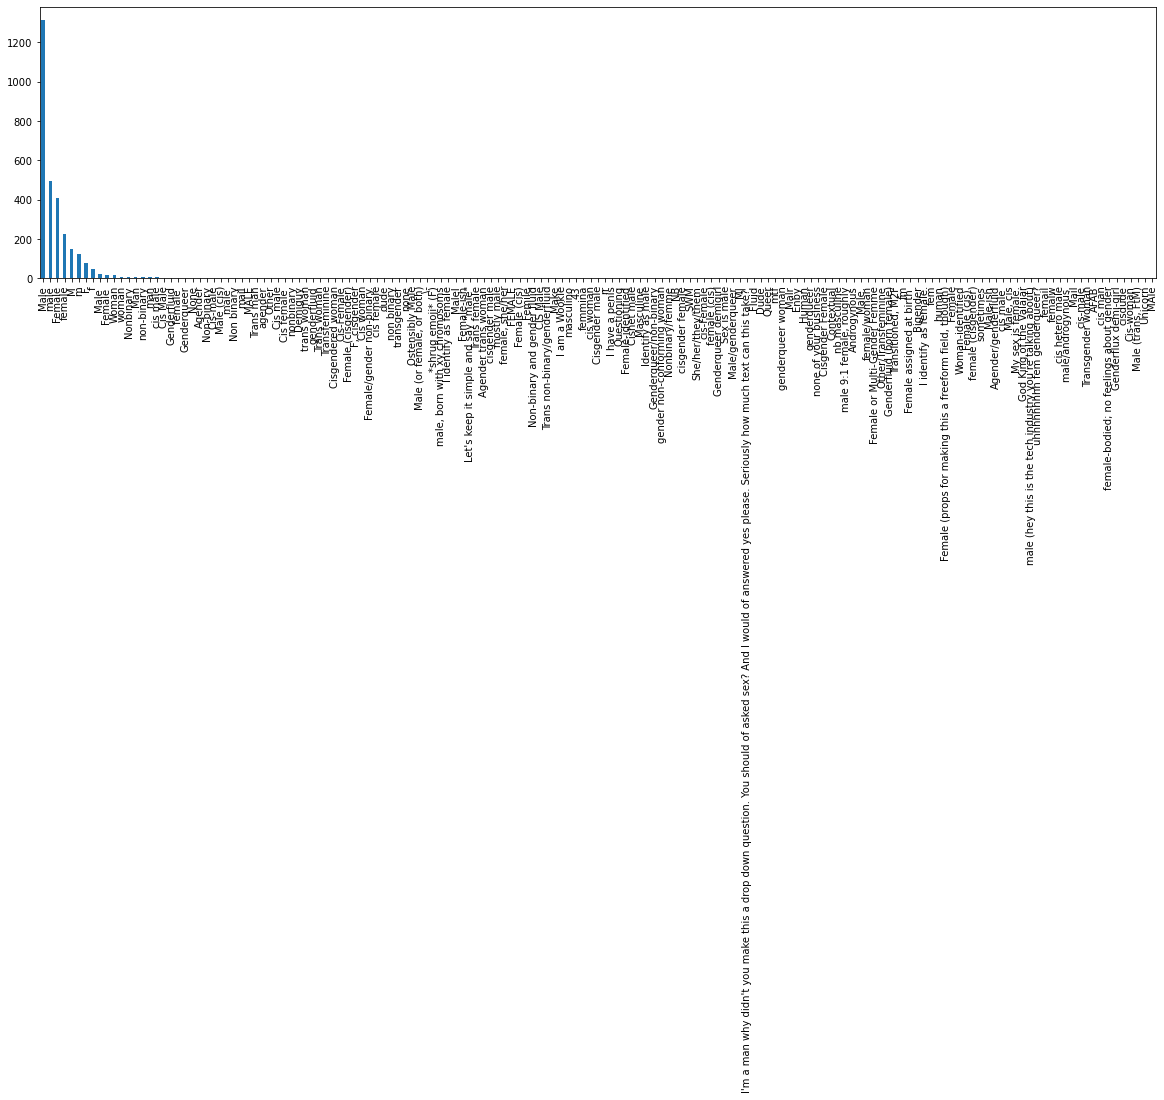

In [82]:
plt.figure(figsize=(20,5))
integrate_df.Gender.value_counts().plot(kind='bar')
plt.savefig('Gender.png', dpi=1000,bbox_inches='tight')

In [83]:
integrate_df.Gender.value_counts()

Male                 1316
male                  493
Female                408
female                226
M                     150
                     ... 
cisdude                 1
Cis-woman               1
Male (trans, FtM)       1
Unicorn                 1
MAle                    1
Name: Gender, Length: 157, dtype: int64

In [84]:
# Categorize Gender to 'Male', 'Female', 'Other'

integrate_df.Gender.unique()

array(['Male', 'male', 'Male ', 'Female', 'M', 'female', 'm',
       'I identify as female.', 'female ', 'Bigender', 'non-binary',
       'Female assigned at birth ', 'F', 'Woman', 'man', 'fm', 'f',
       'Cis female ', 'Transitioned, M2F', 'Genderfluid (born female)',
       'Other/Transfeminine', 'Female or Multi-Gender Femme', 'Female ',
       'woman', 'female/woman', 'Cis male', 'Male.', 'Androgynous',
       'male 9:1 female, roughly', nan, 'Male (cis)', 'Other',
       'nb masculine', 'Cisgender Female', 'Man', 'Sex is male',
       'none of your business', 'genderqueer', 'cis male', 'Human',
       'Genderfluid', 'Enby', 'Malr', 'genderqueer woman', 'mtf', 'Queer',
       'Agender', 'Dude', 'Fluid',
       "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'fem', 'Nonbinary', 'male ',
       'human', 'Female (props for making th

In [85]:
rep_dic = {
    'Male':'Male', 
    'male': 'Male', 'Male ':'Male', 'Female':'Female', 'M':'Male', 'female':'Female', 'm':'Male',
       'I identify as female.':'Female', 'female ':'Female', 'Bigender':'Other', 'non-binary':'Other',
       'Female assigned at birth ':'Other', 'F': 'Female', 'Woman':'Female', 'man':'Male', 'fm':'Female', 
    'f':'Female',
       'Cis female ': 'Female', 'Transitioned, M2F': 'Other', 'Genderfluid (born female)':'Other',
       'Other/Transfeminine': 'Other', 'Female or Multi-Gender Femme':'Femae', 'Female ':'Female',
       'woman':'Female', 'female/woman':'Female', 'Cis male':'Male', 'Male.':'Male', 'Androgynous':'Other',
       'male 9:1 female, roughly':'Other', 'Male (cis)':'Male', 'Other':'Other',
       'nb masculine':'Other', 'Cisgender Female':'Female', 'Man':'Male', 'Sex is male':'Male',
       'none of your business':'Other', 'genderqueer':'Other', 'cis male':'Male', 'Human':'Other',
       'Genderfluid':'Other', 'Enby':'Other', 'Malr':'Male', 'genderqueer woman': 'Other', 'mtf':'Other', 
    'Queer':'Other',
       'Agender':'Other', 'Dude':'Male', 'Fluid':'Other',
       "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ":'Male',
       'mail':'Male', 'M|':'Male', 'Male/genderqueer':'Other', 'fem':'Female', 'Nonbinary':'Other', 'male ':'Male',
       'human':'Other', 'Female (props for making this a freeform field, though)':'Female',
       ' Female':'Female', 'Unicorn':'Other', 'Cis Male':'Male', 'Male (trans, FtM)':'Other', 'Cis-woman':'Female',
       'Genderqueer':'Other', 'cisdude':'Male', 'Genderflux demi-girl':'Other',
       'female-bodied; no feelings about gender':'Other', 'cis man':'Male', 'AFAB':'Female',
       'Transgender woman':'Other', 'MALE':'Male', 'cis-male':'Male', 'Mail':'Male',
       'male/androgynous ':"Other", 'cis hetero male':'Male', 'femalw':'Female', 'femail':'Female',
       'uhhhhhhhhh fem genderqueer?':'Other',
       "male (hey this is the tech industry you're talking about)":'Male',
       'female (cis)':'Female', 'God King of the Valajar':'Other', 'My sex is female.':'Other',
       'Cis-male':'Male', 'Non-binary':'Other', 'Male, cis':'Male', 'cis male ':'Male',
       'Agender/genderfluid':'Other', 'Male-ish':'Male', 'sometimes':'Other',
       'female (cisgender)':'Female', 'Female (cis) ':'Female', 'Woman-identified':'Female',
       'Contextual':'Other', 'Non binary':'Other', 'Genderqueer demigirl':'Other',
       'Genderqueer/non-binary':'Other', 'cis-Female':'Female', 'cis female':'Female', 'nonbinary':'Other',
       'F, cisgender':'Female', 'Female-ish':'Female', '\\-':'Other', 'trans woman':'Other',
       'Transfeminine':'Other', 'None':'Other', 'dude':'Male', 'Ostensibly Male':'Other',
       'male, born with xy chromosoms':'Male', 'Malel':'Male', 'I identify as female':'Female',
       '*shrug emoji* (F)':'Female', 'Male (or female, or both)':'Other', 'Trans man':'Other',
       'transgender':'Other', 'non binary':'Other', 'Female/gender non-binary.':'Other',
       'Cis woman':'Female', 'Female (cisgender)':'Female', 'Cis-Female':'Female',
       'Cisgendered woman':'Female', 'Trans woman':'Other', 'genderfluid':'Other', 'Demiguy':'Other',
       'none':'Other', 'Trans female':'Other', 'Cisgender male':'Male', 'She/her/they/them':'Other',
       'SWM':'Other', 'cisgender female':'Female', 'NB':'Other', 'Nonbinary/femme':'Other',
       'gender non-conforming woman':'Other',
       'Let\'s keep it simple and say "male"':'Male', 'Identify as male':'Male',
       'Masculine':'Other', 'Cishet male':'Male', 'Female-identified':'Female', 'agender':'Other',
       'Questioning':'Other', 'I have a penis':'Other', 'rr':'Other', 'cis woman':'Other',
       'Agender trans woman':'Other', 'femmina':'Other', '43':'Other', 'masculino':'Other',
       'I am a Wookie':'Other', 'Make':'Male', 'Trans non-binary/genderfluid':'Other',
       'CIS Male':'Male', 'Non-binary and gender fluid':'Other', 'Femile':'Female',
       'Female (cis)':'Female', 'FEMALE':'Female', 'female, she/her':'Female', 'mostly male':'Other', 'Femae':'Female',
       'cisgender male':'Male', 'MAle':'Male'
}

In [86]:
# replace Gender values by either 'Male', 'Female', 'Other'
integrate_df.Gender = integrate_df.Gender.replace(rep_dic)

In [87]:
integrate_df.Gender.value_counts()

Male      2169
Female     842
Other      100
Femae        1
Name: Gender, dtype: int64

In [88]:

# Recheck to see what other columns need cleaning
for col in integrate_df.columns:
    print(col)
    print(integrate_df[col].unique())
    print('---------------------------------------')

SupportQ1
['Not eligible for coverage / N/A' 'No' nan 'Yes' "I don't know"
 'Not eligible for coverage / NA']
---------------------------------------
SupportQ2
['No' 'Yes' nan "I don't know"]
---------------------------------------
SupportQ3
['No' 'Yes' nan "I don't know"]
---------------------------------------
SupportQ4
["I don't know" 'Yes' nan 'No']
---------------------------------------
SupportQ5
['Very easy' 'Somewhat easy' 'Neither easy nor difficult' nan
 'Very difficult' 'Somewhat difficult' "I don't know" 'Difficult']
---------------------------------------
AttitudeQ1
['Yes' 'Maybe' nan 'No']
---------------------------------------
AttitudeQ2
['Maybe' nan 'Yes' 'No']
---------------------------------------
AttitudeQ3
['Somewhat open' 'Neutral'
 'Not applicable to me (I do not have a mental illness)' 'Very open'
 'Not open at all' 'Somewhat not open' 5 4 10 8 3 6 2 9 7 1 0]
---------------------------------------
SupportEx1
[nan "I'm not sure" 'Yes' 'No' 'No change' 'Negative

## Cleaning AttitudeQ3

**AttitudeQ3 means: How willing would you be to share with friends and family that you have a mental illness?**

In [89]:
integrate_df['AttitudeQ3'].value_counts()

Somewhat open                                            640
10                                                       265
8                                                        264
7                                                        256
Very open                                                251
5                                                        219
Somewhat not open                                        214
6                                                        163
9                                                        162
Neutral                                                  141
Not applicable to me (I do not have a mental illness)    112
3                                                        108
4                                                         86
2                                                         79
Not open at all                                           75
0                                                         55
1                       

In [90]:
replace_dic = {10:'Very open',
              9:'Very open',
              8:'Somewhat open',
              7:'Somewhat open',
              6:'Somewhat open',
              5:'Neutral',
              4:'Somewhat not open',
              3:'Somewhat not open',
              2:'Somewhat not open',
              1:'Not open at all',
              0:'Not open at all'}

In [91]:
integrate_df['AttitudeQ3']= integrate_df.AttitudeQ3.replace(replace_dic)

In [92]:
integrate_df.AttitudeQ3.value_counts()

Somewhat open                                            1323
Very open                                                 678
Somewhat not open                                         487
Neutral                                                   360
Not open at all                                           178
Not applicable to me (I do not have a mental illness)     112
Name: AttitudeQ3, dtype: int64

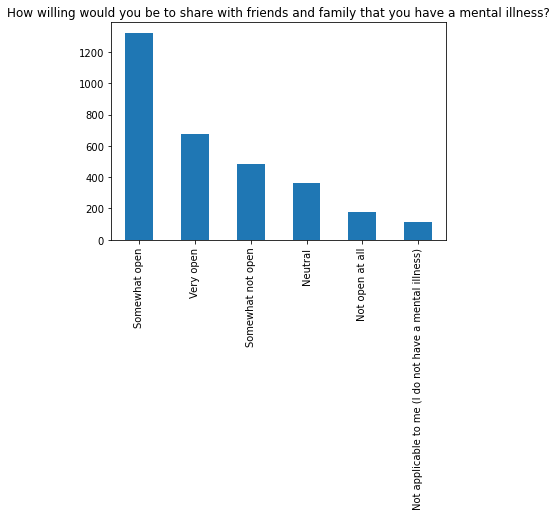

In [93]:
integrate_df.AttitudeQ3.value_counts().plot(kind='bar')
plt.title(Column_dict['AttitudeQ3'])
plt.show()

In [94]:
for col in integrate_df.columns:
    print(col)
    print(integrate_df[col].unique())
    print('---------------------------------------')

SupportQ1
['Not eligible for coverage / N/A' 'No' nan 'Yes' "I don't know"
 'Not eligible for coverage / NA']
---------------------------------------
SupportQ2
['No' 'Yes' nan "I don't know"]
---------------------------------------
SupportQ3
['No' 'Yes' nan "I don't know"]
---------------------------------------
SupportQ4
["I don't know" 'Yes' nan 'No']
---------------------------------------
SupportQ5
['Very easy' 'Somewhat easy' 'Neither easy nor difficult' nan
 'Very difficult' 'Somewhat difficult' "I don't know" 'Difficult']
---------------------------------------
AttitudeQ1
['Yes' 'Maybe' nan 'No']
---------------------------------------
AttitudeQ2
['Maybe' nan 'Yes' 'No']
---------------------------------------
AttitudeQ3
['Somewhat open' 'Neutral'
 'Not applicable to me (I do not have a mental illness)' 'Very open'
 'Not open at all' 'Somewhat not open']
---------------------------------------
SupportEx1
[nan "I'm not sure" 'Yes' 'No' 'No change' 'Negatively' 'Positively']
-----

## Clean SupportQ1

In [95]:
integrate_df.SupportQ1.value_counts()

Yes                                1331
I don't know                        708
No                                  416
Not eligible for coverage / N/A      83
Not eligible for coverage / NA       71
Name: SupportQ1, dtype: int64

In [96]:
replace_dic = { 'Not eligible for coverage / N/A': 'Not eligible',
               'Not eligible for coverage / NA': 'Not eligible'}

integrate_df.SupportQ1 = integrate_df.SupportQ1.replace(replace_dic)

In [97]:
integrate_df.SupportQ1.value_counts()

Yes             1331
I don't know     708
No               416
Not eligible     154
Name: SupportQ1, dtype: int64

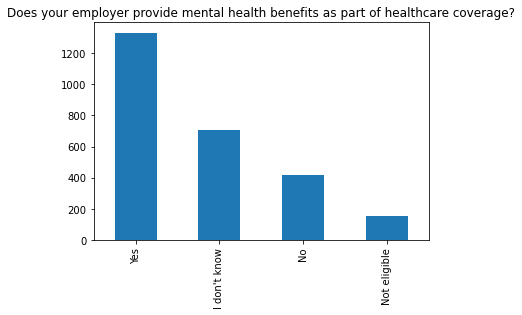

In [98]:
integrate_df.SupportQ1.value_counts().plot(kind='bar')
plt.title(Column_dict['SupportQ1'])
plt.show()

## Cleaning SupportEx1 and SupportEX2

In [99]:
Column_dict['SupportEx1']

'If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?'

In [100]:
Column_dict['SupportEx1']

'If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?'

In [101]:
integrate_df.SupportEx1.unique()

array([nan, "I'm not sure", 'Yes', 'No', 'No change', 'Negatively',
       'Positively'], dtype=object)

In [102]:
replace_dic = {'Yes': "I'm not sure",
               'No': "I'm not sure"}

In [103]:
integrate_df.SupportEx1 = integrate_df.SupportEx1.replace(replace_dic)
integrate_df.SupportEx2 = integrate_df.SupportEx2.replace(replace_dic)

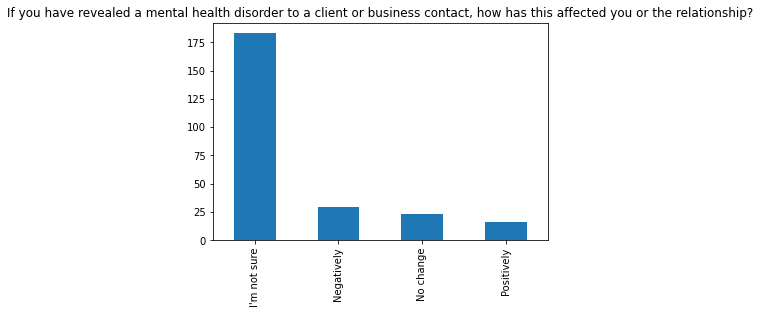

In [104]:
integrate_df.SupportEx1.value_counts().plot(kind='bar')
plt.title(Column_dict['SupportEx1'])
plt.show()

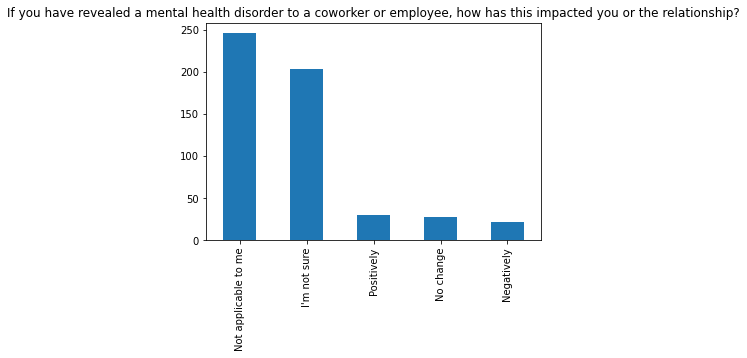

In [105]:
integrate_df.SupportEx2.value_counts().plot(kind='bar')
plt.title(Column_dict['SupportEx2'])
plt.show()

## Clean Treatment column

In [107]:
Column_dict['Treatment']

'Have you ever sought treatment for a mental health disorder from a mental health professional?'

In [106]:
integrate_df.Treatment.value_counts()

1    1857
0    1281
Name: Treatment, dtype: int64

In [108]:
replace_dic = {0:'No',
              1: 'Yes'}

In [109]:
integrate_df.Treatment = integrate_df.Treatment.replace(replace_dic)

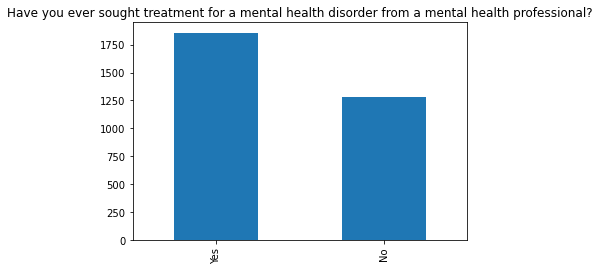

In [110]:
integrate_df.Treatment.value_counts().plot(kind='bar')
plt.title(Column_dict['Treatment'])
plt.show()

# Detecting and dealing with outliers and errors

In [114]:
for col in integrate_df.columns:
    print(col)
    print(integrate_df[col].value_counts())
    print('----------------------------------------------------')

SupportQ1
Yes             1331
I don't know     708
No               416
Not eligible     154
Name: SupportQ1, dtype: int64
----------------------------------------------------
SupportQ2
No              1702
Yes              665
I don't know     242
Name: SupportQ2, dtype: int64
----------------------------------------------------
SupportQ3
No              1153
Yes              757
I don't know     699
Name: SupportQ3, dtype: int64
----------------------------------------------------
SupportQ4
I don't know    1633
Yes              813
No               163
Name: SupportQ4, dtype: int64
----------------------------------------------------
SupportQ5
Somewhat easy                 681
Very easy                     536
I don't know                  399
Somewhat difficult            378
Neither easy nor difficult    362
Difficult                     135
Very difficult                118
Name: SupportQ5, dtype: int64
----------------------------------------------------
AttitudeQ1
Yes      973


In [115]:
import seaborn as sns
sns.set()

<AxesSubplot:xlabel='Age'>

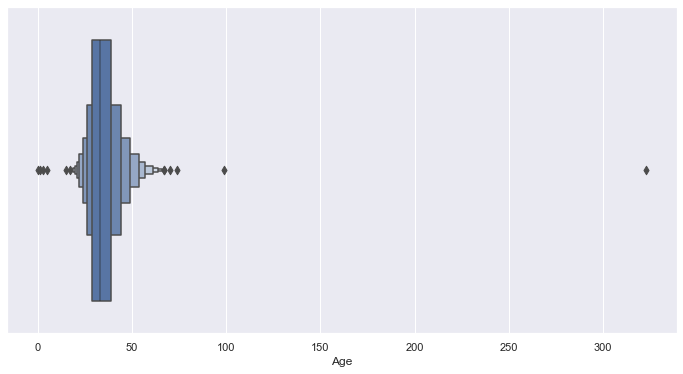

In [120]:
# Inspecting the Age column
plt.figure(figsize=(12, 6))
sns.boxenplot(x='Age', data=integrate_df)
plt.title(Column_dict['Age'])
plt.show()

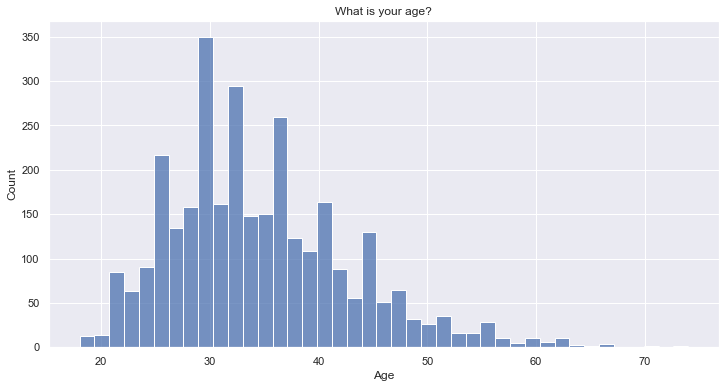

In [139]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Age', data=integrate_df)
plt.title(Column_dict['Age'])
plt.show()

There seem to exist two unreasonably high and unreasonably low values for age. These are probably mistaken inputs. Therefore, I'm going to switch these values to NaN. Age below 18 years old will also be set to NaN.

In [131]:
# replacing outliers by 'NaN'
BM = (integrate_df['Age'] > 90) | (integrate_df['Age'] < 18)
for idx in integrate_df[BM].index:
    integrate_df.at[idx,'Age'] = np.nan

In [133]:
# checking 
integrate_df[BM]['Age']

93     NaN
372    NaN
564    NaN
656    NaN
808    NaN
2720   NaN
2963   NaN
2964   NaN
Name: Age, dtype: float64

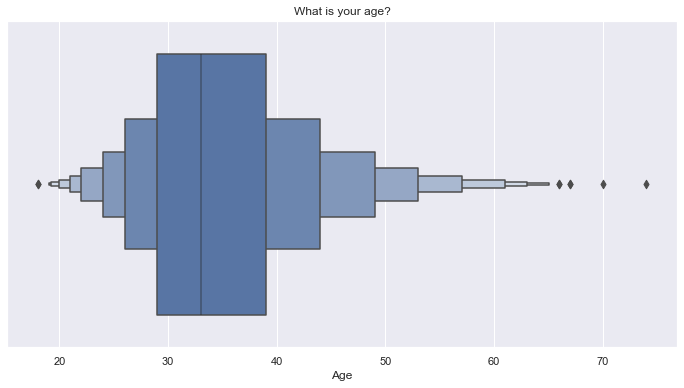

In [138]:
plt.figure(figsize=(12,6))
sns.boxenplot(x='Age', data=integrate_df)
plt.title(Column_dict['Age'])
plt.show()

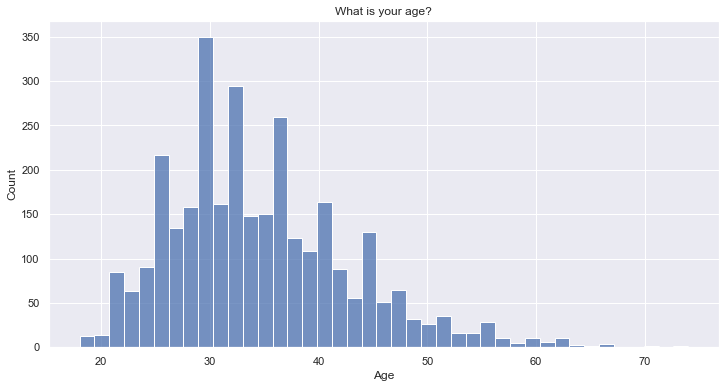

In [137]:
plt.figure(figsize=(12,6))
sns.histplot(x='Age', data=integrate_df)
plt.title(Column_dict['Age'])
plt.show()

In [140]:
integrate_df.columns

Index(['SupportQ1', 'SupportQ2', 'SupportQ3', 'SupportQ4', 'SupportQ5',
       'AttitudeQ1', 'AttitudeQ2', 'AttitudeQ3', 'SupportEx1', 'SupportEx2',
       'Age', 'Gender', 'ResidingCountry', 'WorkingCountry', 'MentalIlness',
       'Treatment', 'Year'],
      dtype='object')

In [148]:
cat_attributes = ['SupportQ1', 'SupportQ2', 'SupportQ3', 'SupportQ4', 'SupportQ5',
                  'AttitudeQ1', 'AttitudeQ2', 'AttitudeQ3', 'SupportEx1', 'SupportEx2',
                  'Gender', 'ResidingCountry', 'WorkingCountry', 'MentalIlness',
                  'Treatment', 'Year']

num_attributes = ['Age']

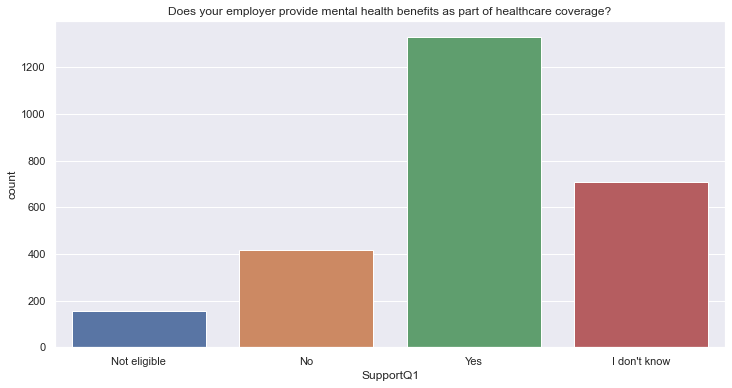

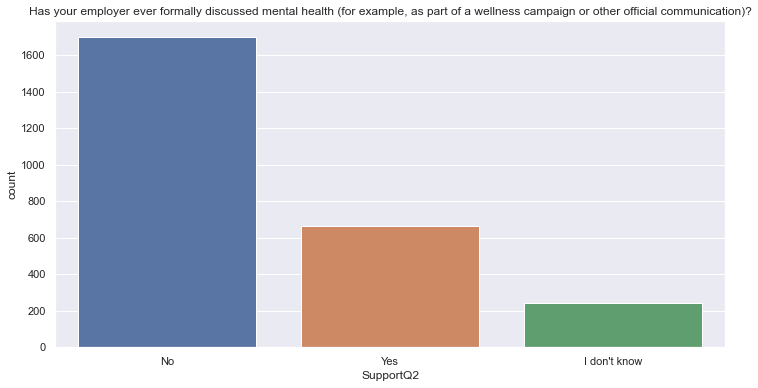

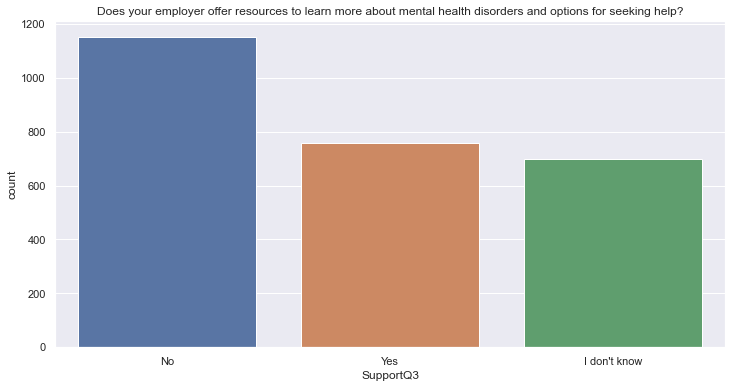

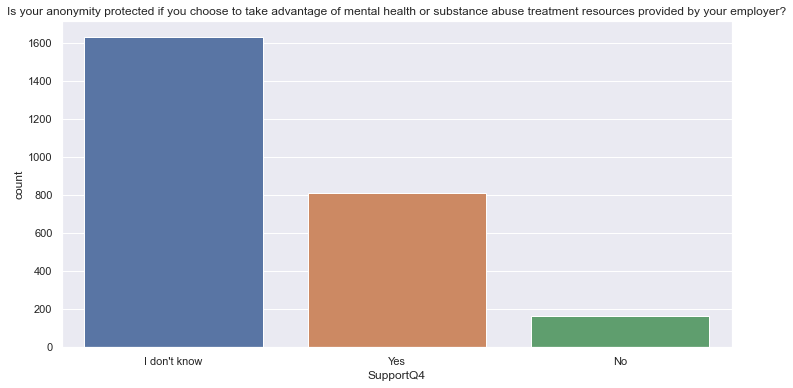

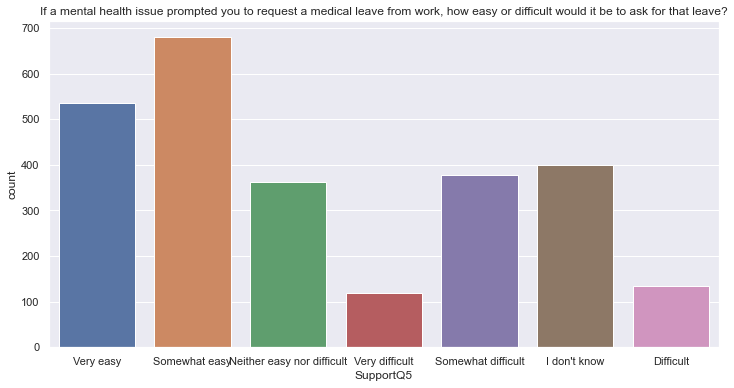

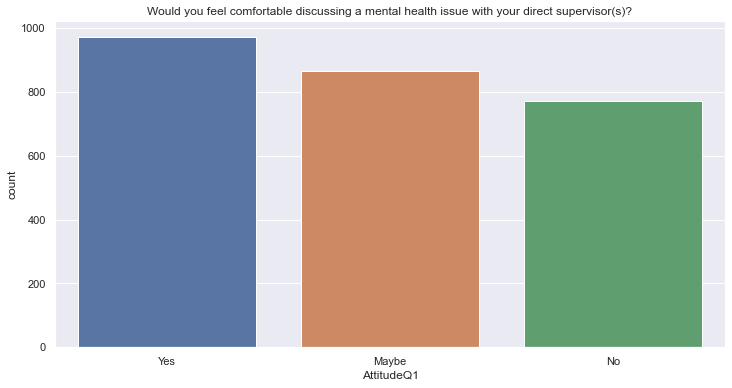

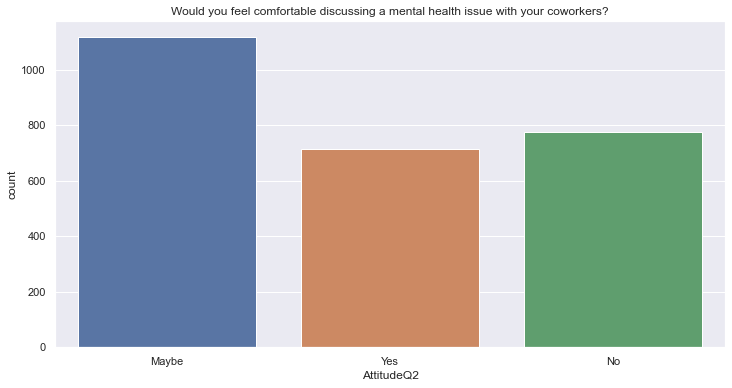

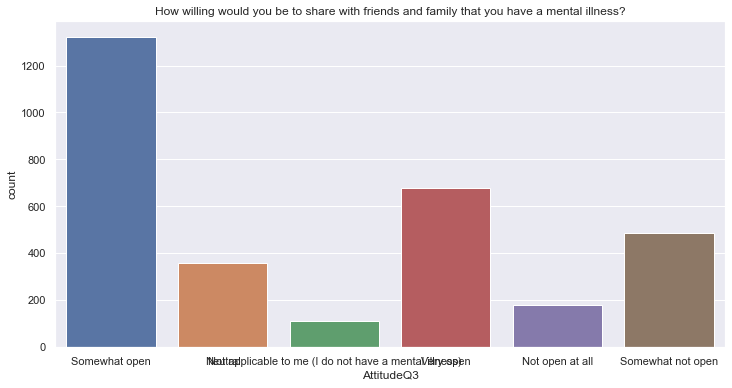

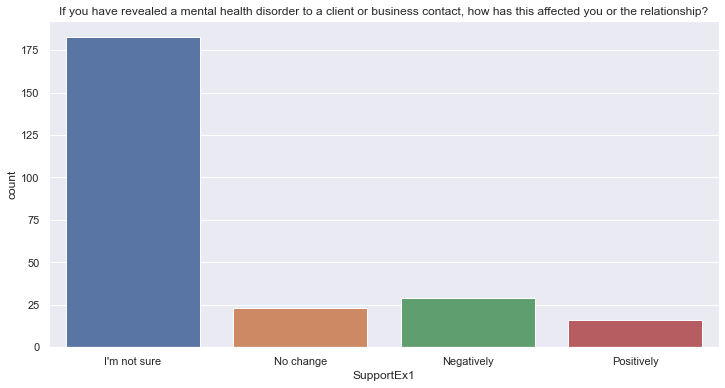

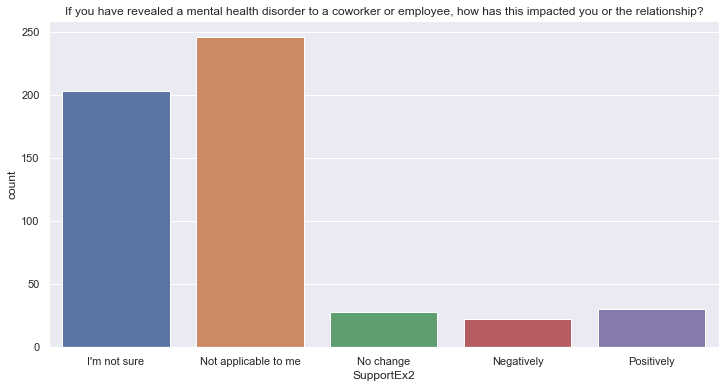

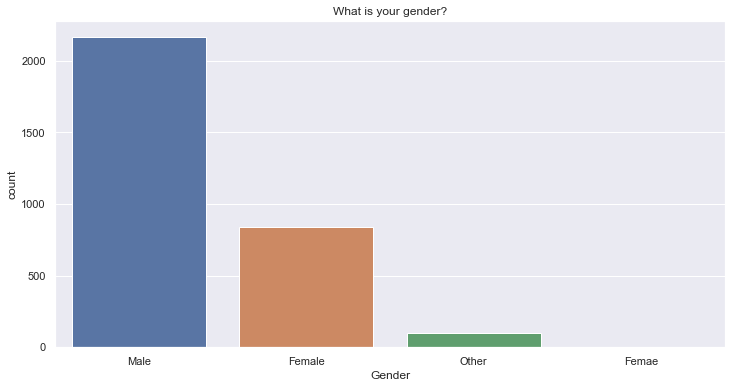

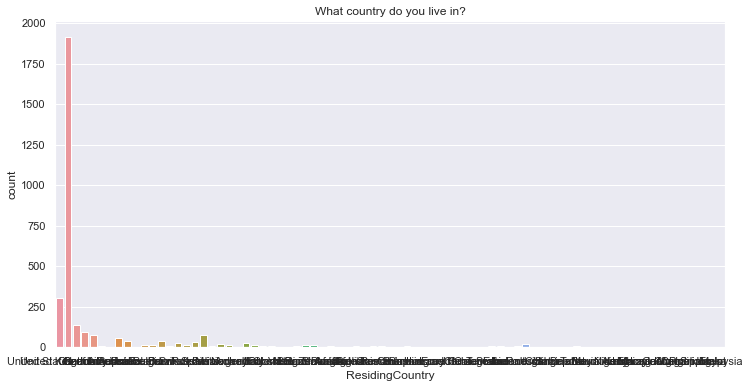

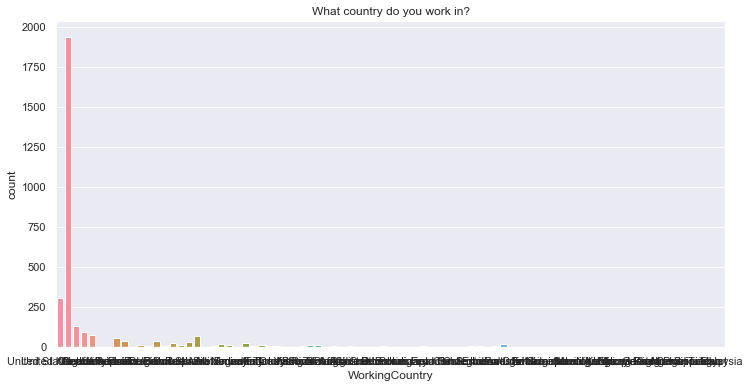

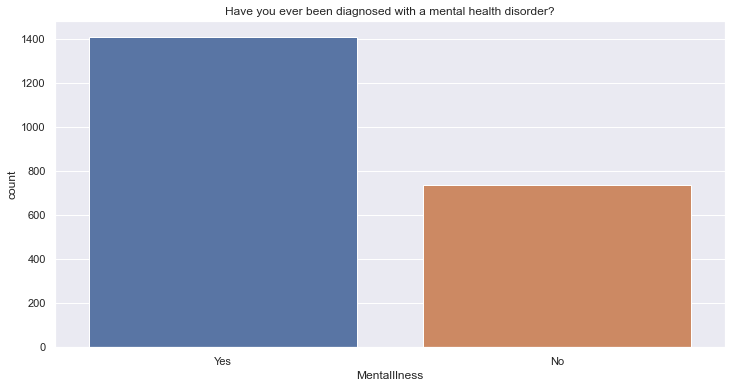

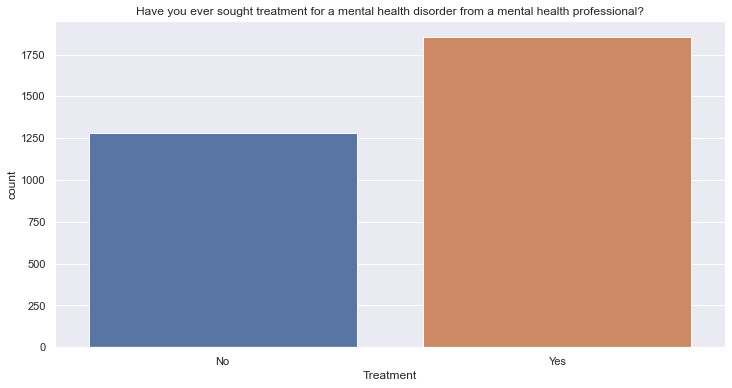

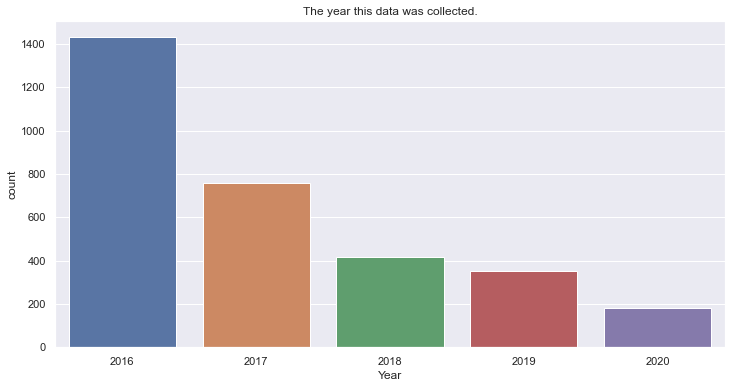

In [149]:
for att in cat_attributes:
    plt.figure(figsize=(12,6))
    sns.countplot(x=att, data=integrate_df)
    plt.title(Column_dict[att])
    plt.show()

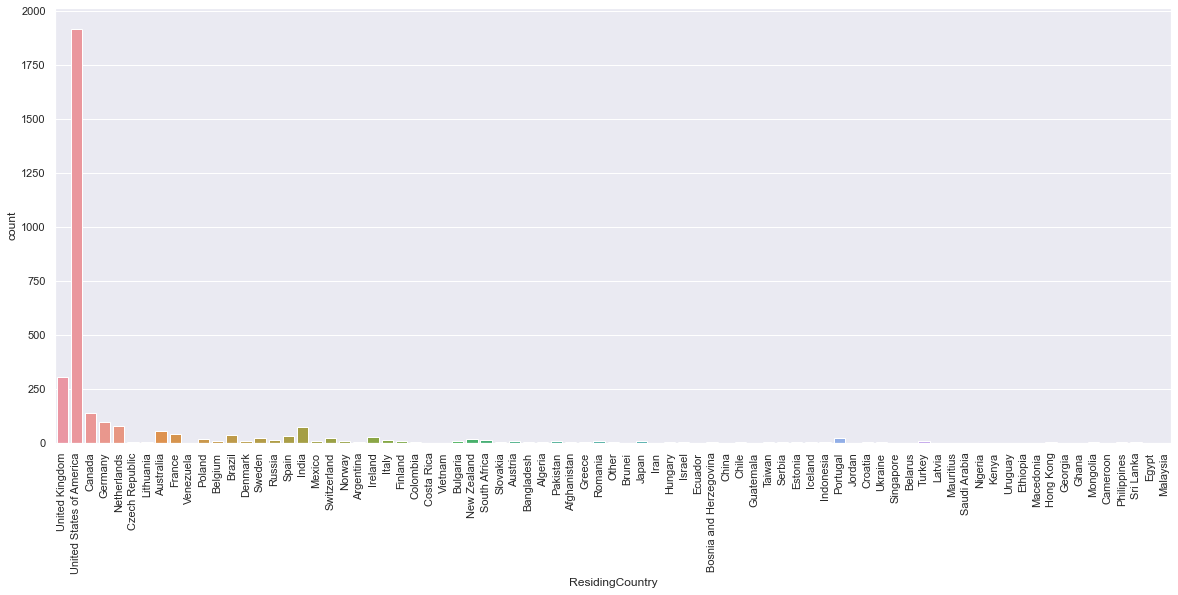

In [156]:
plt.figure(figsize=(20,8))
sns.countplot(x='ResidingCountry', data=integrate_df)
plt.tick_params(axis='x', rotation=90)
plt.show()

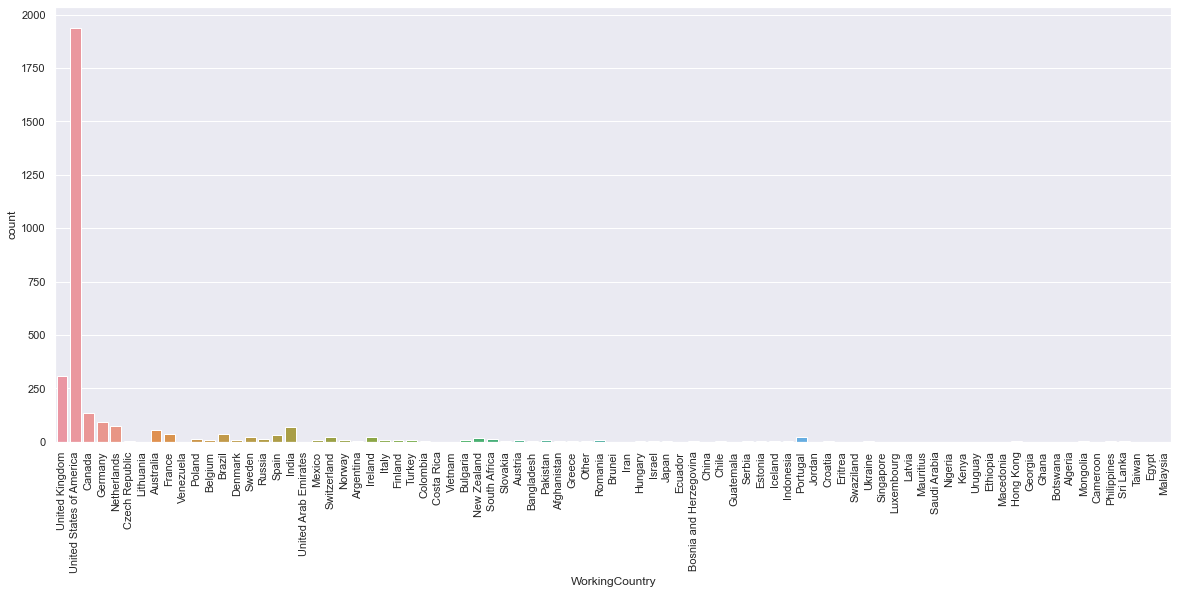

In [157]:
plt.figure(figsize=(20,8))
sns.countplot(x='WorkingCountry', data=integrate_df)
plt.tick_params(axis='x', rotation=90)
plt.show()

There are more data entries from the US than the other countries. This might be because the survey participation was more encouraged in the US. 

To deal with this situation, the best way is to focus the analysis on the US respondents instead of the whole data. Therefore, I'm going to remove all the rows, except for the ones that have 'United States of America' under both WorkingCountry and ResidingCountry.


In [160]:
BM = (integrate_df.ResidingCountry == 'United States of America') & \
    (integrate_df.WorkingCountry == 'United States of America')

in_df_us = integrate_df[BM]

In [162]:
in_df_us.ResidingCountry.value_counts()

United States of America    1913
Name: ResidingCountry, dtype: int64

In [163]:
in_df_us.WorkingCountry.value_counts()

United States of America    1913
Name: WorkingCountry, dtype: int64

In [164]:
# droppping the ResidingCountry and WorkingCountry columns

in_df_us.drop(columns=['ResidingCountry','WorkingCountry'], inplace=True)

C:\Users\benfa\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [168]:
in_df_us.reset_index(drop=True, inplace=True)

In [169]:
# creating a checkpoint
in_df = in_df_us

In [170]:
in_df.head(5)

,SupportQ1,SupportQ2,SupportQ3,SupportQ4,SupportQ5,AttitudeQ1,AttitudeQ2,AttitudeQ3,SupportEx1,SupportEx2,Age,Gender,MentalIlness,Treatment,Year
0,No,Yes,Yes,Yes,Somewhat easy,Yes,Maybe,Somewhat open,NaN,NaN,29.0,Male,Yes,Yes,2016
1,Yes,No,No,No,Neither easy nor difficult,No,Maybe,Somewhat open,NaN,NaN,43.0,Female,Yes,Yes,2016
2,I don't know,No,No,I don't know,Somewhat easy,Yes,Maybe,Not applicable to me (I do not have a mental i...,NaN,NaN,30.0,Male,No,No,2016
3,Yes,No,Yes,Yes,Very easy,Yes,Maybe,Somewhat open,NaN,NaN,37.0,Female,Yes,Yes,2016
4,I don't know,No,No,I don't know,Very difficult,Maybe,Yes,Somewhat open,NaN,NaN,44.0,Female,Yes,Yes,2016


## Detecting and Dealing with missing values

In [172]:
# find count of missing values 

for col in in_df.columns:
    
    BM = in_df[col].isnull()
    missing = in_df[BM]
    print(col)
    print(len(missing))
    print('-----------------------------------------')

SupportQ1
228
-----------------------------------------
SupportQ2
228
-----------------------------------------
SupportQ3
228
-----------------------------------------
SupportQ4
228
-----------------------------------------
SupportQ5
228
-----------------------------------------
AttitudeQ1
228
-----------------------------------------
AttitudeQ2
228
-----------------------------------------
AttitudeQ3
0
-----------------------------------------
SupportEx1
1810
-----------------------------------------
SupportEx2
1685
-----------------------------------------
Age
4
-----------------------------------------
Gender
10
-----------------------------------------
MentalIlness
536
-----------------------------------------
Treatment
0
-----------------------------------------
Year
0
-----------------------------------------


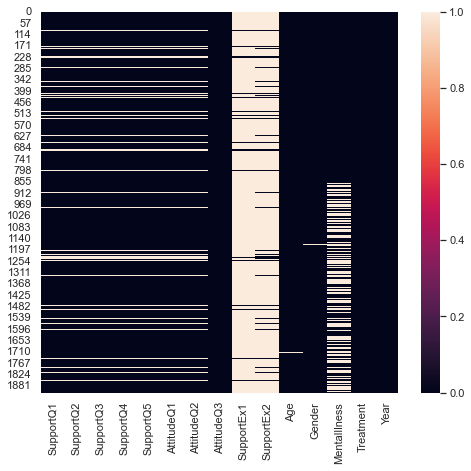

In [175]:
# which attributes have considerable missing values?
plt.figure(figsize=(8,7))
sns.heatmap(in_df.isna())
plt.show()

Considering the preceding figure, the answer to our wondering is yes, some data objects have missing values on more than one attribute. The missing values for the attributes from SupportQ1 to AttitudeQ3 are from the same data objects. However, the preceding figure brings our attention to the fact that the missing values under SupportEx1 and SupportEx2 are much more troublesome, as the majority of the data objects have missing values under these two attributes. 

The best way of moving forward in these situations is to forego having these attributes. So these two attributes have been removed from the analysis. 

Now, let's bring our attention back to the common missing values among the data objects for the attributes from SupportQ1 to AttitudeQ3.

 

In [176]:
in_df.drop(columns=['SupportEx1','SupportEx2'], inplace=True)

C:\Users\benfa\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


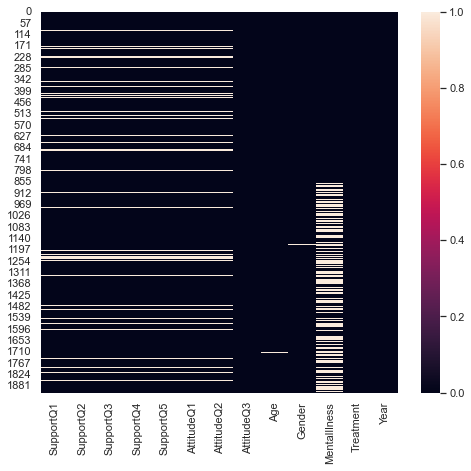

In [177]:
plt.figure(figsize=(8,7))
sns.heatmap(in_df.isna())
plt.show()